#326 Bhairavi Sunil- RNN

In [17]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf 
import numpy as np

In [12]:
# Set random seed for reproducibility
tf.random.set_seed(42)

In [13]:
# Load IMDB dataset

max_features = 1000
maxLen = 500
batch_size = 32

print("Loading Data ... ")

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = max_features)
# print(train_data)
print("Dataset loaded")

Loading Data ... 
Dataset loaded


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to have a consistent length
train_data_padded = pad_sequences(train_data, maxlen=maxLen)
test_data_padded = pad_sequences(test_data, maxlen=maxLen)

train_data_np = np.array(train_data_padded)
test_data_np = np.array(test_data_padded)

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding (if necessary)
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

In [15]:
#Building the RNN model
# rom tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))

model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(2,activation = 'sigmoid'))

#Compile the Model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 34146 (133.38 KB)
Trainable params: 34146 (133.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Train the model
history = model.fit(train_data_padded, train_labels_onehot, epochs=5, batch_size=batch_size, validation_split=0.2)


Epoch 1/5
625/625 [==============================] - 30s 47ms/step - loss: 0.6026 - accuracy: 0.6597 - val_loss: 0.4947 - val_accuracy: 0.7766
Epoch 2/5
625/625 [==============================] - 29s 47ms/step - loss: 0.5176 - accuracy: 0.7559 - val_loss: 0.5104 - val_accuracy: 0.7652
Epoch 3/5
625/625 [==============================] - 30s 47ms/step - loss: 0.5977 - accuracy: 0.6795 - val_loss: 0.6214 - val_accuracy: 0.6310
Epoch 4/5
625/625 [==============================] - 30s 47ms/step - loss: 0.5944 - accuracy: 0.6743 - val_loss: 0.6461 - val_accuracy: 0.6046
Epoch 5/5
625/625 [==============================] - 30s 47ms/step - loss: 0.5463 - accuracy: 0.7199 - val_loss: 0.5323 - val_accuracy: 0.7606


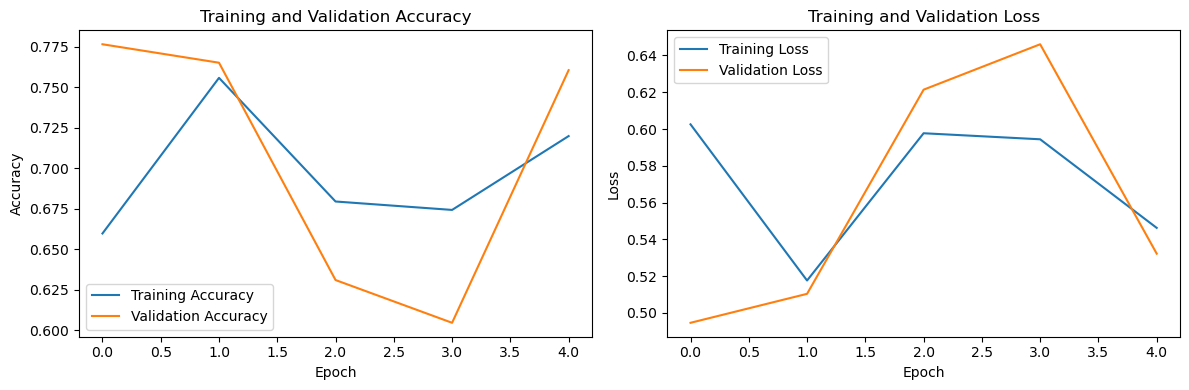

In [20]:
import matplotlib.pyplot as plt
# Plot accuracy and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

# Select 4 random indices from the test dataset
random_indices = np.random.choice(len(test_data_padded), size=4, replace=False)

# Get the corresponding sequences and labels
selected_sequences = test_data_padded[random_indices]
selected_labels = test_labels_onehot[random_indices]

# Predict the labels using the trained model
predictions = model.predict(selected_sequences)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Function to convert indices back to words (excluding unknown words)
def indices_to_text(indices, word_index):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i, '') for i in indices if i in reverse_word_index])

# Convert indices to text for selected sequences
selected_text = [indices_to_text(sequence, imdb.get_word_index()) for sequence in selected_sequences]

# Print actual and predicted responses along with the text
for i, index in enumerate(random_indices):
    print(f"Example {i + 1}:")
    print(f"Text: {selected_text[i]}")
    print(f"Actual Label: {np.argmax(selected_labels[i])}")
    print(f"Predicted Label: {predicted_labels[i]}")
    print("------")

1/1 [==============================] - 0s 23ms/step
Example 1:
Text: the was how least as on are so and and and to one he's life that and up that else it to it else by br of where many this actors was although except our town that watch only how leads not is over and are when me obvious watch wife that cast is again and seem seems and in form first put that three and out beauty this enough of and br of on action his at and but is both my but despite that and in we see watch only particular leads for and and and and and male it up been out is and came evil of bunch this but be performances war and don't and all and about more it and and to score br that and it's and out now of and br were and features of their top this and and to which no from and poor his woman what that had with of and movie of on and her end of and to was can't of actor of and with and is too come of totally and it played of and and to give and and and was after through are to are has of and and message of you not wa